In [1]:
# Zdroje kódov a inšpirácie:
# 
# Výpočet chí-kvadrátového testu (chi2_contingency) a zobrazenie výsledkov vo forme heatmapy boli inšpirované dokumentáciou knižnice SciPy: 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
#
# Vizualizácia odľahlých hodnôt pomocou boxplotov vychádzala z príkladov v dokumentácii Seaborn:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
#
# Pridávanie hodnôt nad stĺpce v bar grafe (annotate) bolo inšpirované príspevkami na Stack Overflow a dokumentáciou Matplotlib:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import matplotlib.patches as mpatches 
%matplotlib inline

In [3]:
#data read
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
#some core info
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#class distribution
stroke['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [6]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


C:\Users\maxor\AppData\Local\Temp\ipykernel_38008\1883900059.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


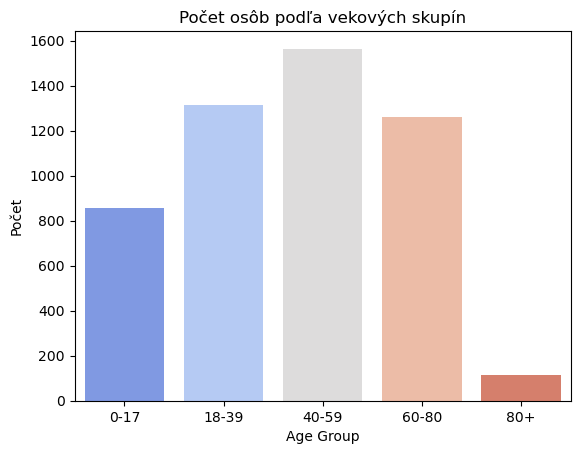

In [7]:
#create age group to understand age distibution
stroke['age_group'] = pd.cut(stroke['age'], bins = [0, 17, 39, 59, 80, 100], labels=['0-17', '18-39', '40-59', '60-80', '80+'])
ax = sns.countplot(data = stroke, x = 'age_group', palette = 'coolwarm', hue = 'age_group')
plt.ylabel('Počet')
plt.xlabel('Age Group')
plt.title('Počet osôb podľa vekových skupín')
plt.legend().remove()
plt.show()

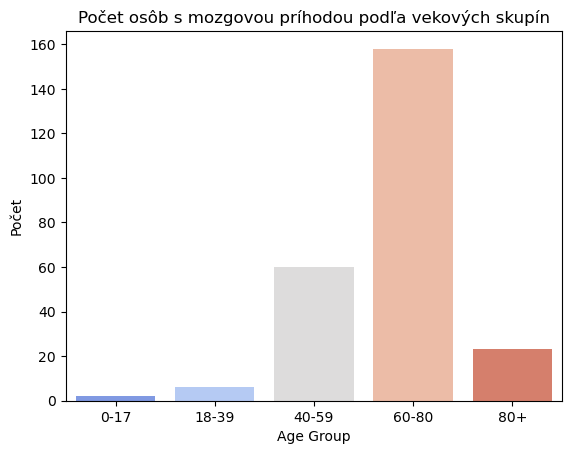

In [8]:
#age and stroke
stroke['age_group'] = pd.cut(stroke['age'], bins = [0, 17, 39, 59, 80, 100], labels=['0-17', '18-39', '40-59', '60-80', '80+'])
age_stroke = stroke['age_group'][stroke['stroke'] == 1]
sns.countplot(data = stroke, x = age_stroke, palette = 'coolwarm', hue = 'age_group')
plt.ylabel('Počet')
plt.xlabel('Age Group')
plt.title('Počet osôb s mozgovou príhodou podľa vekových skupín')
plt.legend().remove()
plt.show()

In [9]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
 12  age_group          5110 non-null   category
dtypes: category(1), float64(3), int64(4), object(5)
memory usage: 484.4+ KB


C:\Users\maxor\AppData\Local\Temp\ipykernel_38008\2625021288.py:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data = stroke, x = 'gender', hue = 'gender', palette = custom_colors)


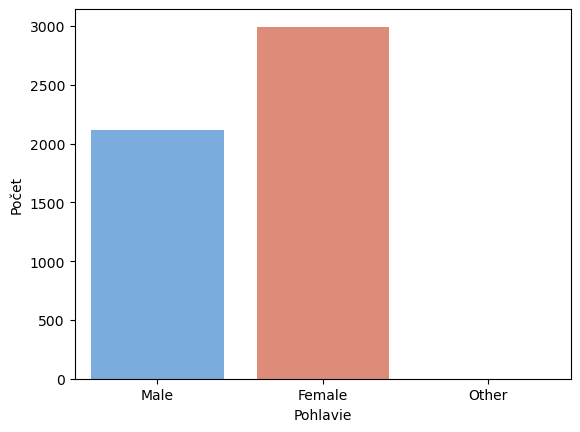

In [10]:
#gender distribution
custom_colors = ['#6aaced', '#ed816a']
sns.countplot(data = stroke, x = 'gender', hue = 'gender', palette = custom_colors)
plt.xlabel('Pohlavie')
plt.ylabel('Počet')
plt.show()

C:\Users\maxor\AppData\Local\Temp\ipykernel_38008\2627517259.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g_gender.set_xticklabels(['Muž', 'Žena'])


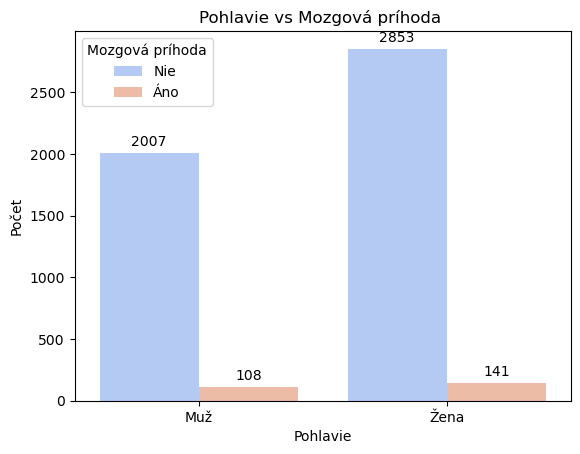

In [11]:
#gender vs stroke
custom_palette = ['#4c72b0', '#dd8452']
g_gender = sns.countplot(data=stroke[stroke['gender'].isin(['Male', 'Female'])], x='gender', hue='stroke', palette='coolwarm')
plt.xlabel('Pohlavie')
plt.ylabel('Počet')
plt.title('Pohlavie vs Mozgová príhoda ')
g_gender.set_xticklabels(['Muž', 'Žena'])

#add values on bars
for p in g_gender.patches:
    height = p.get_height()
    if height > 0: #add label if height is more than 0
        g_gender.annotate(f'{int(height)}', 
                                (p.get_x() + p.get_width() / 2., height), #position: center-top of the bar
                                ha='center', va='bottom', #align text horizontally and vertically
                                fontsize=10, color='black', 
                                xytext=(0, 3), textcoords='offset points') #move text slightly above the bar

 
plt.legend(title='Mozgová príhoda', labels=['Nie', 'Áno']) 
plt.show()

C:\Users\maxor\AppData\Local\Temp\ipykernel_38008\1501151513.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g_hypertension.set_xticklabels(['Bez hypertenzie ', 'S hypertenziou'])


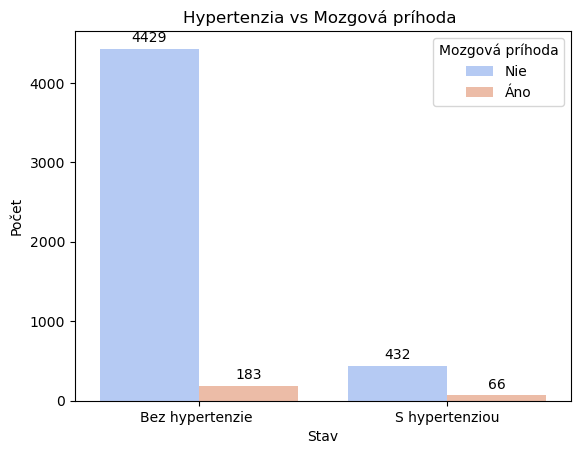

In [12]:
#hypertension vs stroke
custom_palette = ['#4c72b0', '#dd8452']
g_hypertension = sns.countplot(data=stroke, x='hypertension', hue='stroke', palette='coolwarm')
plt.xlabel('Stav')
plt.ylabel('Počet')
plt.title('Hypertenzia vs Mozgová príhoda ')
g_hypertension.set_xticklabels(['Bez hypertenzie ', 'S hypertenziou'])

#add values on bars
for p in g_hypertension.patches:
    height = p.get_height()
    if height > 0:
        g_hypertension.annotate(f'{int(height)}', 
                                (p.get_x() + p.get_width() / 2., height),
                                ha='center', va='bottom', 
                                fontsize=10, color='black', 
                                xytext=(0, 3), textcoords='offset points')

plt.legend(title='Mozgová príhoda', labels=['Nie', 'Áno']) 
plt.show()

C:\Users\maxor\AppData\Local\Temp\ipykernel_38008\4198931394.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g_heart_disease.set_xticklabels(['Bez ochorenia', 'S ochorením'])


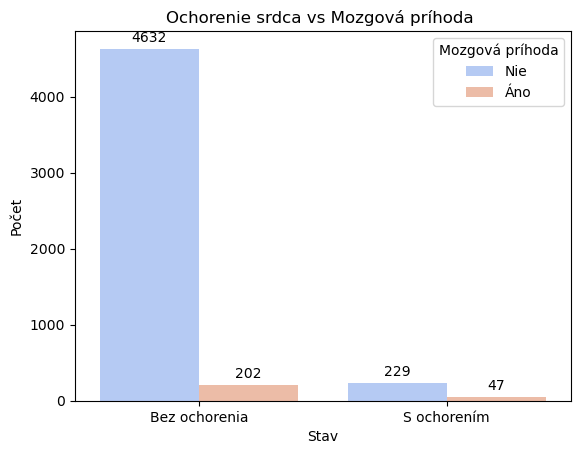

In [13]:
#heart diseases vs stroke
custom_palette = ['#4c72b0', '#dd8452']
g_heart_disease = sns.countplot(data = stroke, x = 'heart_disease', hue = 'stroke', palette='coolwarm')
plt.xlabel('Stav')
plt.ylabel('Počet')
plt.title('Ochorenie srdca vs Mozgová príhoda ')
g_heart_disease.set_xticklabels(['Bez ochorenia', 'S ochorením'])

#add values on bars 
for p in g_heart_disease.patches:
    height = p.get_height()
    if height > 0:
        g_heart_disease.annotate(f'{int(height)}', 
                                (p.get_x() + p.get_width() / 2., height),
                                ha='center', va='bottom', 
                                fontsize=10, color='black', 
                                xytext=(0, 3), textcoords='offset points')

plt.legend(title='Mozgová príhoda', labels=['Nie', 'Áno']) 
plt.show()

C:\Users\maxor\AppData\Local\Temp\ipykernel_38008\3246955645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  stroke_count = sns.countplot(data = stroke, x = 'stroke', palette = 'coolwarm')
C:\Users\maxor\AppData\Local\Temp\ipykernel_38008\3246955645.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  stroke_count.set_xticklabels(['Nie', 'Áno'])


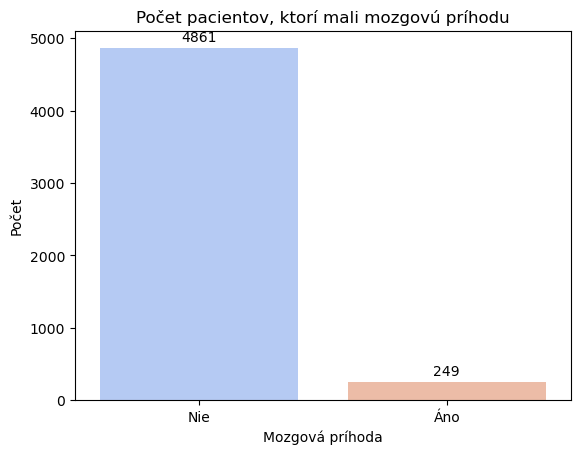

In [14]:
#visualisation of stroke distribution
custom_palette = ['#4c72b0', '#dd8452']
stroke_count = sns.countplot(data = stroke, x = 'stroke', palette = 'coolwarm')
#add values on bars
for p in stroke_count.patches:
    height = p.get_height()
    if height > 0:
        stroke_count.annotate(f'{int(height)}', 
                                (p.get_x() + p.get_width() / 2., height),
                                ha='center', va='bottom', 
                                fontsize=10, color='black', 
                                xytext=(0, 3), textcoords='offset points')
stroke_count.set_xticklabels(['Nie', 'Áno'])
plt.xlabel('Mozgová príhoda')
plt.ylabel('Počet')
plt.title('Počet pacientov, ktorí mali mozgovú príhodu')
plt.show()

In [15]:
#avg glucose level analyzing 
stroke['avg_glucose_level'].max()

271.74

In [16]:
#distribution of glucose level based on WHO info
stroke['group_avg_glucose_level'] = pd.cut(stroke['avg_glucose_level'], bins = [0, 70, 100, 125, 300], labels = ['Nízka', 'Dobrá', 'Vysoká', 'Veľmi vysoká'])

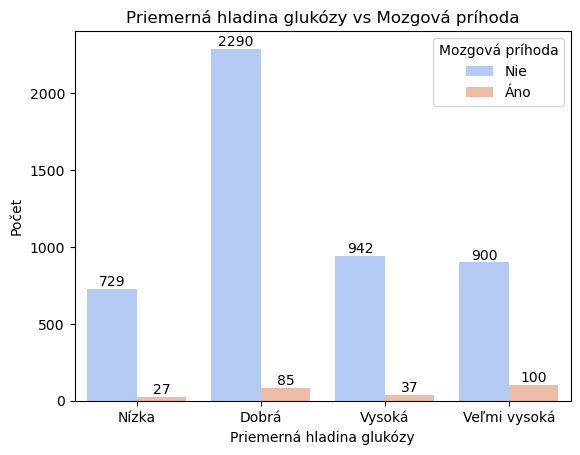

In [17]:
#avg glucose level vs stroke
stroke_glucose = stroke['group_avg_glucose_level']
gl = sns.countplot(data = stroke, x = stroke_glucose, palette = 'coolwarm', hue = 'stroke')
plt.title('Priemerná hladina glukózy vs Mozgová príhoda')
plt.xlabel('Priemerná hladina glukózy')
plt.ylabel('Počet')
plt.legend(title='Mozgová príhoda', labels=['Nie', 'Áno']) 
#add values on bars
for p in gl.patches:
    if p.get_height() > 0:  
        gl.text(
            p.get_x() + p.get_width() / 2,  
            p.get_height() + 0.5,          
            int(p.get_height()),           
            ha='center',                   
            va='bottom',                   
            fontsize=10                   
        )

plt.show()

In [18]:
#bmi and stroke
stroke['bmi'].max()

97.6

In [19]:
#distribution bmi based on WHO info
stroke['group_bmi'] = pd.cut(stroke['bmi'], bins = [0, 18.5, 25, 30, 100], labels = ['Podváha', 'Normálna hmotnosť', 'Pred obezitou', 'Obezita'])

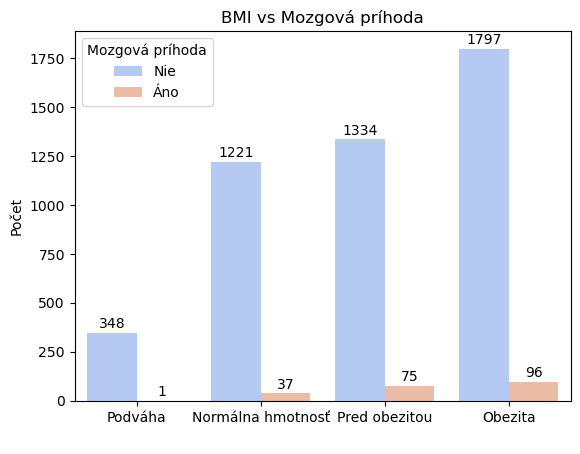

In [20]:
#bmi vs stroke
stroke_bmi = stroke['group_bmi']
g_bmi = sns.countplot(data = stroke, x = stroke_bmi, palette = 'coolwarm', hue = 'stroke')
plt.title('BMI vs Mozgová príhoda')
plt.ylabel("Počet")
plt.xlabel(' ')
plt.legend(title='Mozgová príhoda', labels=['Nie', 'Áno']) 

#add values on bars
for p in g_bmi.patches:
    height = p.get_height()
    if height > 0:
        g_bmi.text(
            p.get_x() + p.get_width() / 2,  
            height + 10,  
            int(height),  
            ha='center',  
            va='bottom',
            fontsize=10,  
            color='black'
        )
plt.show()

In [21]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       5110 non-null   int64   
 1   gender                   5110 non-null   object  
 2   age                      5110 non-null   float64 
 3   hypertension             5110 non-null   int64   
 4   heart_disease            5110 non-null   int64   
 5   ever_married             5110 non-null   object  
 6   work_type                5110 non-null   object  
 7   Residence_type           5110 non-null   object  
 8   avg_glucose_level        5110 non-null   float64 
 9   bmi                      4909 non-null   float64 
 10  smoking_status           5110 non-null   object  
 11  stroke                   5110 non-null   int64   
 12  age_group                5110 non-null   category
 13  group_avg_glucose_level  5110 non-null   category
 14  group_bm

In [22]:
print(stroke['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


C:\Users\maxor\AppData\Local\Temp\ipykernel_38008\2591101365.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g_smoke.set_xticklabels(new_labels)


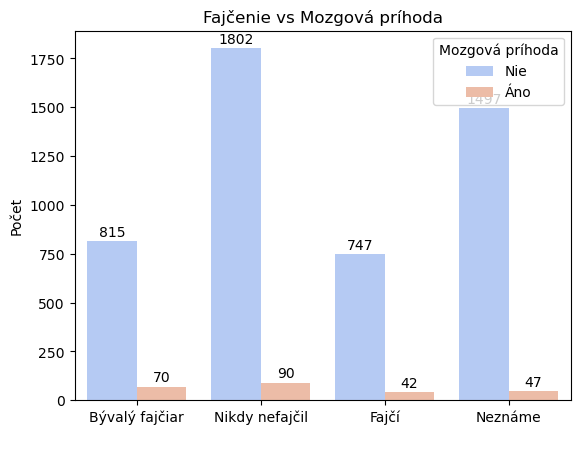

In [23]:
#smoking vs stroke
g_smoke = sns.countplot(data=stroke, x='smoking_status', hue = 'stroke', palette='coolwarm')
plt.title('Fajčenie vs Mozgová príhoda')
plt.xlabel(' ')
plt.ylabel('Počet')
plt.legend(title='Mozgová príhoda', labels=['Nie', 'Áno'])
new_labels = ['Bývalý fajčiar', 'Nikdy nefajčil', 'Fajčí', 'Neznáme']  # List of new labels
g_smoke.set_xticklabels(new_labels)
#add values on bars
for p in g_smoke.patches:
    height = p.get_height()
    if height > 0:
        g_smoke.text(
            p.get_x() + p.get_width() / 2,  
            height + 10,  
            int(height),  
            ha='center',  
            va='bottom',  
            fontsize=10,  
            color='black'
        )
    
plt.show()

In [24]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       5110 non-null   int64   
 1   gender                   5110 non-null   object  
 2   age                      5110 non-null   float64 
 3   hypertension             5110 non-null   int64   
 4   heart_disease            5110 non-null   int64   
 5   ever_married             5110 non-null   object  
 6   work_type                5110 non-null   object  
 7   Residence_type           5110 non-null   object  
 8   avg_glucose_level        5110 non-null   float64 
 9   bmi                      4909 non-null   float64 
 10  smoking_status           5110 non-null   object  
 11  stroke                   5110 non-null   int64   
 12  age_group                5110 non-null   category
 13  group_avg_glucose_level  5110 non-null   category
 14  group_bm

In [25]:
#Residence type analyse

In [26]:
stroke['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

C:\Users\maxor\AppData\Local\Temp\ipykernel_38008\2713256581.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g_residence.set_xticklabels(new_labels, fontsize = 12)


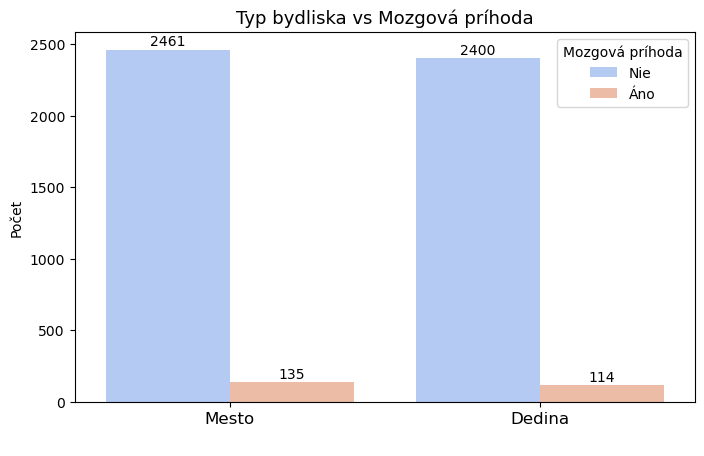

In [27]:
#residence type vs stroke
plt.figure().set_figwidth(8)
g_residence = sns.countplot(data=stroke, x='Residence_type', hue = 'stroke', palette='coolwarm')
plt.title('Typ bydliska vs Mozgová príhoda', fontsize = 13)
plt.xlabel(' ')
plt.ylabel('Počet')
plt.legend(title='Mozgová príhoda', labels=['Nie', 'Áno'])
new_labels = ['Mesto', 'Dedina'] 
g_residence.set_xticklabels(new_labels, fontsize = 12)
#add values on bars
for p in g_residence.patches:
    height = p.get_height()
    if height > 0:
        g_residence.text(
            p.get_x() + p.get_width() / 2, 
            height + 10, 
            int(height),  
            ha='center',  
            va='bottom', 
            fontsize=10,   
            color='black' 
        )
    
plt.show()

In [28]:
#Ever married atr


C:\Users\maxor\AppData\Local\Temp\ipykernel_38008\27464570.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g_mar.set_xticklabels(new_labels)


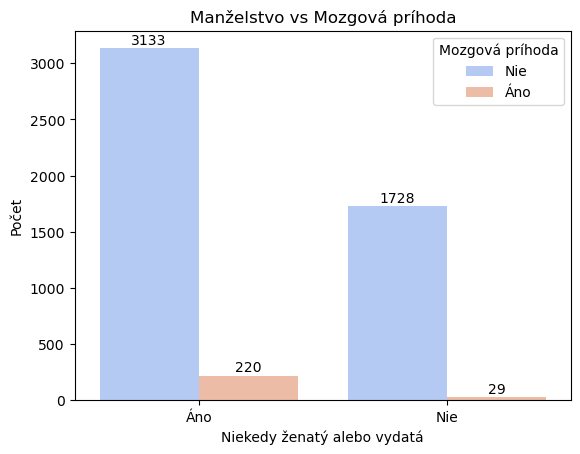

In [29]:
#ever married vs stroke
g_mar = sns.countplot(data=stroke, x='ever_married', hue = 'stroke', palette='coolwarm')
plt.title('Manželstvo vs Mozgová príhoda')
plt.xlabel('Niekedy ženatý alebo vydatá')
plt.ylabel('Počet')
plt.legend(title='Mozgová príhoda', labels=['Nie', 'Áno'])
new_labels = ['Áno', 'Nie'] 
g_mar.set_xticklabels(new_labels)
#add values on bars
for p in g_mar.patches:
    height = p.get_height()
    if height > 0:
        g_mar.text(
            p.get_x() + p.get_width() / 2,  
            height + 10,  
            int(height),  
            ha='center',  
            va='bottom', 
            fontsize=10,   
            color='black' 
        )
    
plt.show()

C:\Users\maxor\AppData\Local\Temp\ipykernel_38008\2207199781.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g_work.set_xticklabels(new_labels, fontsize = 12)


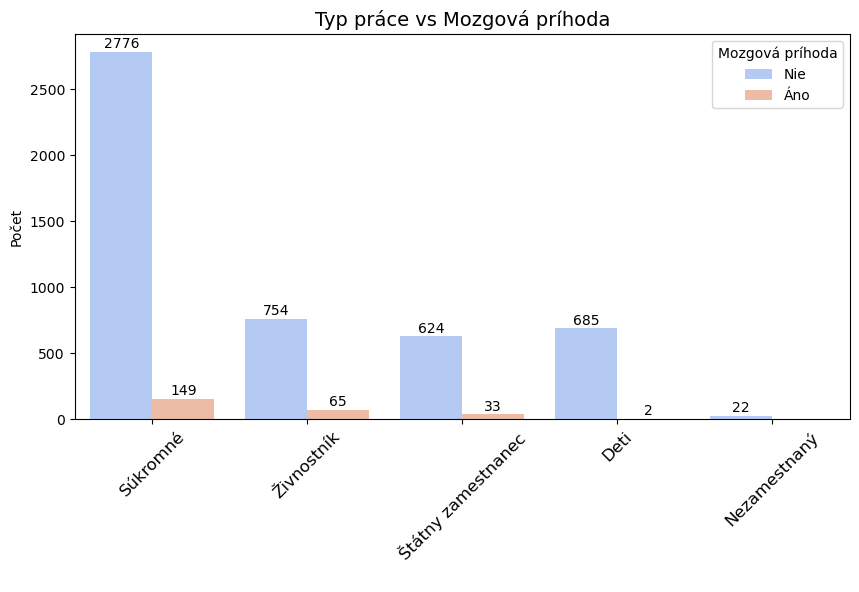

In [30]:
#work type vs stroke
plt.figure(figsize= (10, 5))
g_work = sns.countplot(data=stroke, x='work_type', hue = 'stroke', palette='coolwarm')
plt.title('Typ práce vs Mozgová príhoda', fontsize = 14)
plt.xlabel(' ')
plt.ylabel('Počet')
plt.xticks(rotation = 45)
plt.legend(title='Mozgová príhoda', labels=['Nie', 'Áno'])
#list of translated labels
new_labels = ['Súkromné', 'Živnostník', 'Štátny zamestnanec', 'Deti', 'Nezamestnaný'] 
g_work.set_xticklabels(new_labels, fontsize = 12)
#add values on bars
for p in g_work.patches:
    height = p.get_height()
    if height > 0:
        g_work.text(
            p.get_x() + p.get_width() / 2,  
            height + 10,  
            int(height),  
            ha='center', 
            va='bottom', 
            fontsize=10,  
            color='black' 
        )
    
plt.show()

In [31]:
stroke['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

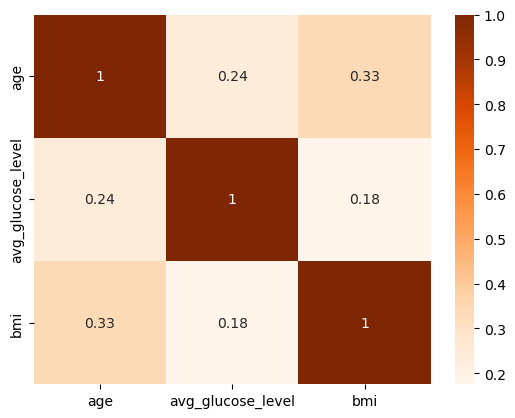

In [32]:
#correlational matrix 
info = stroke[['age', 'avg_glucose_level', 'bmi']]
corr = info.corr(numeric_only = True, method = 'pearson')
sns.heatmap(corr, annot = True, cmap="Oranges")
plt.show()

In [33]:
for col in stroke.select_dtypes(include=['object']).columns:
    stroke[col] = stroke[col].astype('category')

In [34]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       5110 non-null   int64   
 1   gender                   5110 non-null   category
 2   age                      5110 non-null   float64 
 3   hypertension             5110 non-null   int64   
 4   heart_disease            5110 non-null   int64   
 5   ever_married             5110 non-null   category
 6   work_type                5110 non-null   category
 7   Residence_type           5110 non-null   category
 8   avg_glucose_level        5110 non-null   float64 
 9   bmi                      4909 non-null   float64 
 10  smoking_status           5110 non-null   category
 11  stroke                   5110 non-null   int64   
 12  age_group                5110 non-null   category
 13  group_avg_glucose_level  5110 non-null   category
 14  group_bm

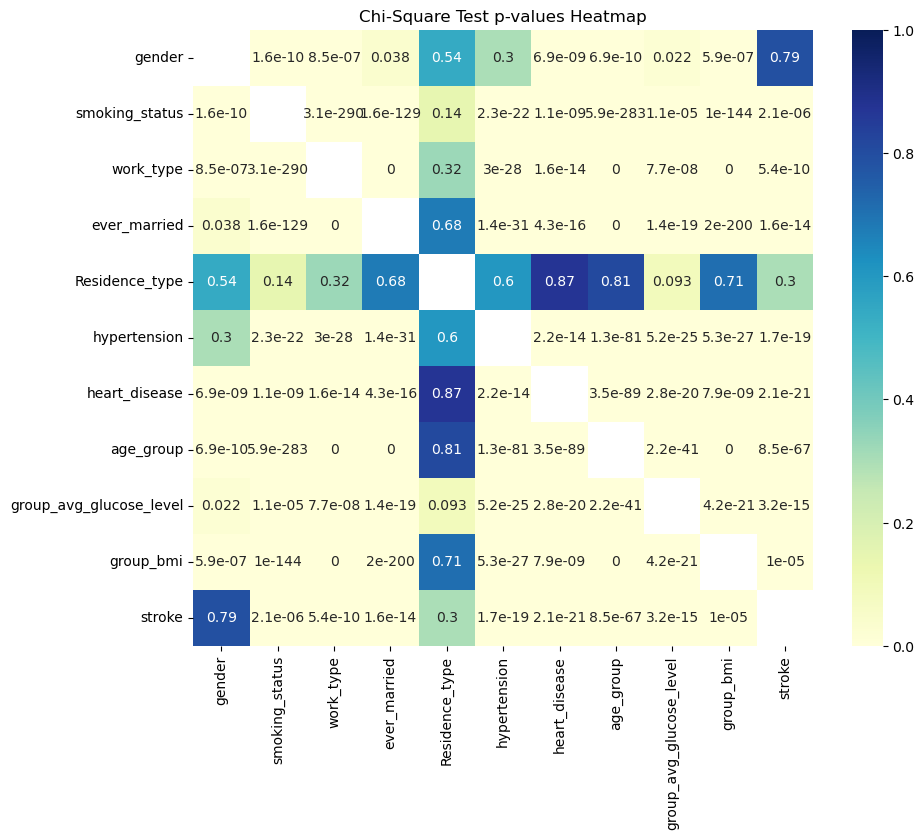

In [35]:
from scipy.stats import chi2_contingency
categorical_columns = ['gender', 'smoking_status', 'work_type', 'ever_married', 'Residence_type', 'hypertension', 'heart_disease', 'age_group', 'group_avg_glucose_level', 'group_bmi','stroke']

#create dataframe to store p-values of chi square test results 
chi2_results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

#compare each column with every other column
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            #create table showing how often each value combination appears
            cross_table = pd.crosstab(stroke[col1], stroke[col2])
            #chi square test
            chi2_stat, p_val, dof, ex = chi2_contingency(cross_table)
            #save p-values
            chi2_results.loc[col1, col2] = p_val
        else:
            #not test a colimn against itself
            chi2_results.loc[col1, col2] = np.nan 

#change p-values to float 
chi2_results = chi2_results.astype(float)

#create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_results, annot=True, cmap="YlGnBu", vmin=0, vmax=1, center=0.5)
plt.title("Chi-Square Test p-values Heatmap")
plt.show()

In [36]:
#basic statistics
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


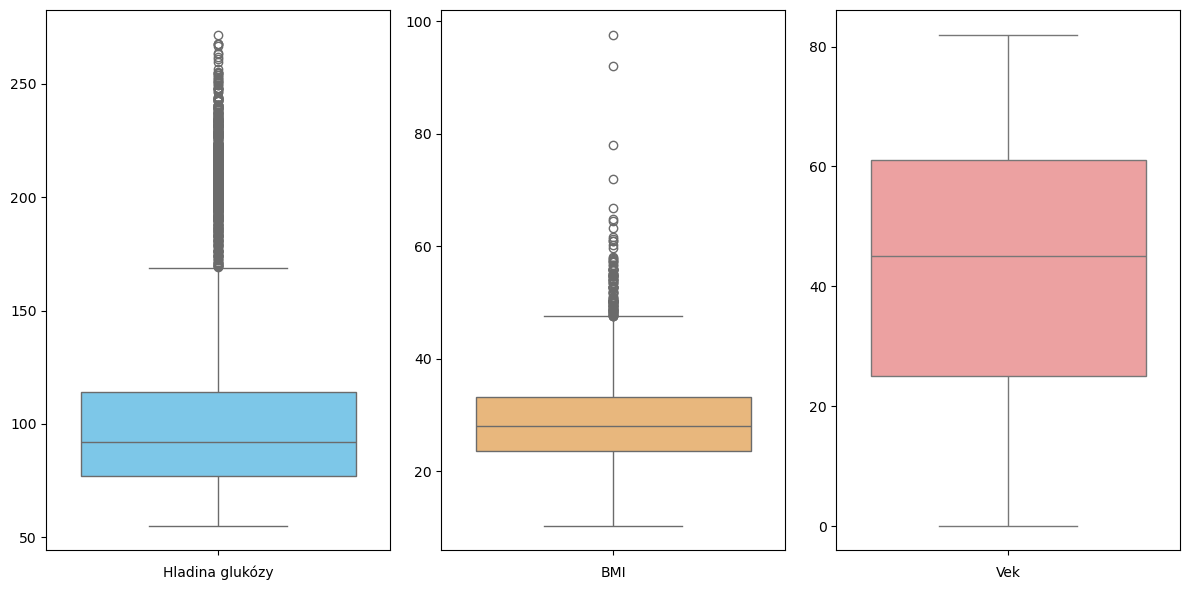

In [37]:
#investigate outliers using boxplots for three numerical attributes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

#create plots for each numerical attribute 
sns.boxplot(stroke['avg_glucose_level'], color='#6bcefa', ax=axes[0])  # blue-glucose
sns.boxplot(stroke['bmi'], color='#fab86b', ax=axes[1])  # orange-bmi
sns.boxplot(stroke['age'], color='#f99494', ax=axes[2])  # red-age

axes[0].set_xlabel('Hladina glukózy')
axes[1].set_xlabel('BMI')
axes[2].set_xlabel('Vek')

#remove y-axis labels
for ax in axes:
    ax.set_ylabel('')
#adjust spacing between plots
plt.tight_layout()
plt.show()